<a href="https://colab.research.google.com/github/ValluruChakravarthy/EDA-Analysis-using-Jupyter/blob/master/EDA%20Analysis_Chakri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases
#aliases for encoding stuff
#seaborn for data visualizations

# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

Import data from Kaggle instead of Local repository

In [2]:
import kagglehub
import os
path = kagglehub.dataset_download("umeradnaan/prediction-of-disaster-management-in-2024")

print("Path to dataset files:", path)

# Define the full old file path
old_file_path = os.path.join(path, "natural_disasters_2024.csv")  # or use the exact file name
new_file_name = "disaster_data.csv"

# Rename the file
os.rename(old_file_path, new_file_name)
print("File relocated successfully")

100%|██████████| 293k/293k [00:00<00:00, 15.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/umeradnaan/prediction-of-disaster-management-in-2024/versions/1
File relocated successfully


### Read in the csv files and remove duplicates

In [3]:
# To find encodings that work

# Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("disaster_data.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful cp1125
successful ascii
successful cp863
successful cp273
successful cp1258
successful iso8859_15
successful cp866
successful shift_jisx0213
successful cp850
successful cp858
successful iso2022_jp_2
successful cp1251
successful iso2022_jp_3
successful iso8859_6
successful big5hkscs
successful iso8859_13
successful shift_jis
successful iso8859_14
successful mac_turkish
successful gb2312
successful iso8859_10
successful iso8859_11
successful cp1250
successful cp852
successful cp869
successful mac_latin2
successful iso2022_jp_1
successful iso2022_jp_2004
successful gb18030
successful kz1048
successful iso8859_3
successful iso8859_7
successful euc_jisx0213
successful utf_8
successful cp950
successful hp_roman8
successful cp949
successful mac_roman
successful utf_7
successful iso8859_5
successful shift_jis_2004
successful cp932
successful ptcp154
successful gbk
successful big5
successful iso8859_4
successful iso2022_kr
successful johab
successful cp037
successful cp860
successful

In [4]:
# Read in the crime.csv file and use the timestamp as a datetime index
disaster = pd.read_csv("disaster_data.csv", encoding="ISO-8859-11")

In [5]:
disaster.head() # Quick check on how the dataset looks like

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08


In [6]:
disaster.shape # Checking the shape of the data. It has 319,073 rows and 17 columns

(10000, 7)

In [7]:
disaster.duplicated().sum() # Counting the duplicate rows

0

In [8]:
disaster.drop_duplicates(inplace=True) # Dropping the duplicate rows

In [9]:
disaster.shape # Checking the shape again to see if dropping the duplicate rows worked

(10000, 7)

### Explore the dataset

In [10]:
disaster.head() # Quick check of the beginning of the dataframe

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08


In [11]:
disaster.tail() # Quick check of the end of the dataframe

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
9995,9996,Hurricane,China,3.092801,2025-02-20 11:00:00,7837,1.067089e+07
9996,9997,Tornado,Brazil,6.652682,2025-02-20 12:00:00,6288,1.414537e+08
9997,9998,Earthquake,Indonesia,6.824656,2025-02-20 13:00:00,673,8.330828e+08
9998,9999,Flood,USA,6.381571,2025-02-20 14:00:00,323,9.502971e+08
9999,10000,Earthquake,Brazil,8.556928,2025-02-20 15:00:00,2620,3.732303e+08


In [12]:
pd.options.display.max_rows = 10

In [13]:
disaster

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08
...,...,...,...,...,...,...,...
9995,9996,Hurricane,China,3.092801,2025-02-20 11:00:00,7837,1.067089e+07
9996,9997,Tornado,Brazil,6.652682,2025-02-20 12:00:00,6288,1.414537e+08
9997,9998,Earthquake,Indonesia,6.824656,2025-02-20 13:00:00,673,8.330828e+08
9998,9999,Flood,USA,6.381571,2025-02-20 14:00:00,323,9.502971e+08


In [14]:
disaster.info() # Summary information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Disaster_ID       10000 non-null  int64  
 1   Disaster_Type     10000 non-null  object 
 2   Location          10000 non-null  object 
 3   Magnitude         10000 non-null  float64
 4   Date              10000 non-null  object 
 5   Fatalities        10000 non-null  int64  
 6   Economic_Loss($)  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [15]:
# Changing the data type from object to datetime for the OCCURRED_ON_DATE column
disaster.OCCURRED_ON_DATE = pd.to_datetime(disaster.Date)

<ipython-input-15-ef9b89ff45ad>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  disaster.OCCURRED_ON_DATE = pd.to_datetime(disaster.Date)


In [16]:
# Check if it worked
disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Disaster_ID       10000 non-null  int64  
 1   Disaster_Type     10000 non-null  object 
 2   Location          10000 non-null  object 
 3   Magnitude         10000 non-null  float64
 4   Date              10000 non-null  object 
 5   Fatalities        10000 non-null  int64  
 6   Economic_Loss($)  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [17]:
# easily extract datetime information frome the OCCURRED_ON_DATE column
disaster.OCCURRED_ON_DATE.dt.year

,Date
0,2024
1,2024
2,2024
3,2024
4,2024
...,...
9995,2025
9996,2025
9997,2025
9998,2025


In [18]:
disaster.OCCURRED_ON_DATE.dt.month

,Date
0,1
1,1
2,1
3,1
4,1
...,...
9995,2
9996,2
9997,2
9998,2


In [19]:
disaster.OCCURRED_ON_DATE.dt.hour

,Date
0,0
1,1
2,2
3,3
4,4
...,...
9995,11
9996,12
9997,13
9998,14


In [20]:
disaster.OCCURRED_ON_DATE.dt.minute

,Date
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [21]:
disaster.describe() # summary information on the numeric columns

,Disaster_ID,Magnitude,Fatalities,Economic_Loss($)
count,10000.00000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,5.559173,4984.928900,5.049752e+08
std,2886.89568,2.619304,2900.114029,2.861325e+08
min,1.00000,1.000656,0.000000,1.036597e+06
25%,2500.75000,3.263217,2481.750000,2.636352e+08
50%,5000.50000,5.589578,4947.000000,5.078407e+08
75%,7500.25000,7.829268,7511.250000,7.527256e+08
max,10000.00000,9.999671,9999.000000,9.998528e+08


In [22]:
disaster.describe(include='object') # summary information on the non-numeric columns

,Disaster_Type,Location,Date
count,10000,10000,10000
unique,5,6,10000
top,Earthquake,Brazil,2024-01-01 00:00:00
freq,2036,1743,1


In [23]:
disaster.columns

Index(['Disaster_ID', 'Disaster_Type', 'Location', 'Magnitude', 'Date',
       'Fatalities', 'Economic_Loss($)'],
      dtype='object')

In [24]:
disaster.columns[np.sum(disaster.isnull()) != 0]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index([], dtype='object')

In [25]:
# Checking for columns with missing values
disaster.columns[np.sum(disaster.isnull()) != 0]

Index([], dtype='object')

In [26]:
# Checking for columns with no missing values
disaster.columns[np.sum(disaster.isnull()) == 0]

Index(['Disaster_ID', 'Disaster_Type', 'Location', 'Magnitude', 'Date',
       'Fatalities', 'Economic_Loss($)'],
      dtype='object')

In [27]:
# Checking for the number of unique values in each column
for col in disaster.columns:
    unique_count = disaster[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

Disaster_ID has 10000 unique values
Disaster_Type has 5 unique values
Location has 6 unique values
Magnitude has 10000 unique values
Date has 10000 unique values
Fatalities has 6314 unique values
Economic_Loss($) has 10000 unique values


### Let's answer some questions

In [28]:
# What are the most brutal Disasters based on Fatalities
disaster. Disaster_Type.value_counts()

,count
Disaster_Type,
Earthquake,2036
Flood,2018
Tornado,2012
Wildfire,1982
Hurricane,1952


In [29]:
disaster.Disaster_Type.value_counts()[:10]

,count
Disaster_Type,
Earthquake,2036
Flood,2018
Tornado,2012
Wildfire,1982
Hurricane,1952


In [30]:
disaster.shape[0]

10000

Data shape before duplicates: (10000, 7)
Data shape after removing duplicates: (10000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Disaster_ID       10000 non-null  int64  
 1   Disaster_Type     10000 non-null  object 
 2   Location          10000 non-null  object 
 3   Magnitude         10000 non-null  float64
 4   Date              10000 non-null  object 
 5   Fatalities        10000 non-null  int64  
 6   Economic_Loss($)  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB
Most brutal disasters based on fatalities:
 Disaster_Type
Earthquake    10095826
Flood         10086080
Tornado       10076567
Hurricane      9883502
Wildfire       9707314
Name: Fatalities, dtype: int64


<ipython-input-33-9356371ce6b5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brutal_disasters.index, y=brutal_disasters.values, palette="viridis")


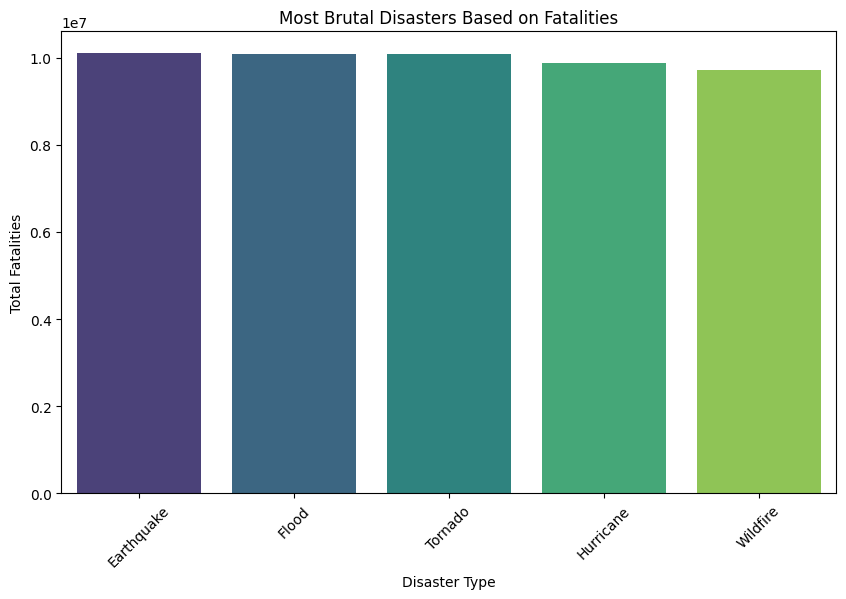

In [33]:
disaster = pd.read_csv("disaster_data.csv", encoding="ISO-8859-11")
print("Data shape before duplicates:", disaster.shape)

# Remove duplicates and check data shape
disaster.drop_duplicates(inplace=True)
print("Data shape after removing duplicates:", disaster.shape)

# Step 3: Initial exploration
disaster.head()
disaster.tail()
disaster.info()

# Convert relevant date columns to datetime if needed (Example: "OCCURRED_ON_DATE")
disaster[""] = pd.to_datetime(disaster["Date"], errors='coerce')
disaster.describe()

# Step 4: Answering analysis question - Brutal disasters based on Fatalities
# Assuming 'Fatalities' column contains relevant data for severity assessment
brutal_disasters = disaster.groupby("Disaster_Type")["Fatalities"].sum().sort_values(ascending=False)
print("Most brutal disasters based on fatalities:\n", brutal_disasters)

plt.figure(figsize=(10, 6))
sns.barplot(x=brutal_disasters.index, y=brutal_disasters.values, palette="viridis")
plt.title("Most Brutal Disasters Based on Fatalities")
plt.xlabel("Disaster Type")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=45)
plt.show()